In [352]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

In [353]:
def resize(image, max_size):
    height, width = image.shape[:2]

    if width > height:
        new_width = max_size
        ratio = max_size / width
        new_height = int(height * (max_size / width))
    else:
        new_height = max_size
        ratio = max_size / height
        new_width = int(width * (max_size / height))
    resized_image = cv2.resize(image, (new_width, new_height))
    return resized_image, ratio

In [354]:
image = cv2.imread('../forms/form.png')
max_size = 3000

resized_image, resize_ratio = resize(image, max_size)
drawImage = resized_image.copy()

In [355]:
def deskew(edges, original):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(edges, kernel) 
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    angles = []
    for contour in contours:
        minAreaRect = cv2.minAreaRect(contour)
        angle = minAreaRect[-1]
        if angle != 90.0 and angle != -0.0: #filter out 0 and 90
            angles.append(angle)

    angles.sort()
    mid_angle = angles[int(len(angles)/2)]

    if angle > 45: #anti-clockwise
            angle = -(90 - angle)
    height = original.shape[0]
    width = original.shape[1]
    m = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    deskewed = cv2.warpAffine(original, m, (width, height), borderValue=(255,255,255))

    return deskewed

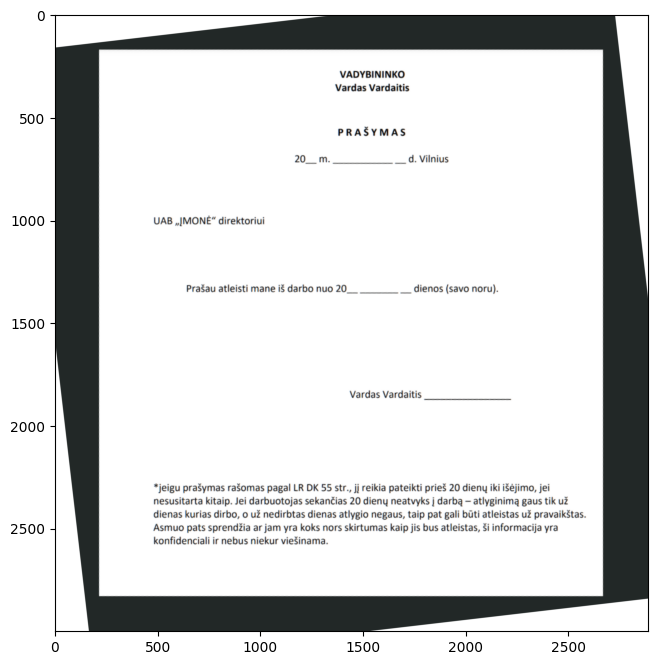

In [356]:
gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 5, 15)
deskewed = deskew(edges, resized_image)

cv2.imwrite('../forms/deskewed.png', deskewed)

plt.figure(figsize=(10, 8))
plt.imshow(deskewed, cmap='gray')
plt.show()